# Creating Trading Alogrithms

# Plan For Today
1. Import Historical Trading Data (from y-finance)
2. Create a trading algorithmn for a Moving Average strategy
3. Backtest this strategy
4. Evaluating performance
5. Optimising performance

In [1]:
# Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.express as px

In [2]:
# Ticker list to download
tickers = 'SPY QQQ TLT AAPL MSFT GOOG AMZN NFLX NVDA TSLA'

# Download data from Yahoo-Finance
data = yf.download(
    tickers = tickers,
    start="2020-01-01", # From what point do we want to start getting stock data
    end="2024-04-30", # From what point do we want to stop getting stock data
    interval = "1d", # The sample rate of the data one stock data every day
    ignore_tz=True,
    auto_adjust=True, # Adjust all fields by splits and dividends
)

# get close adjusted prices
data.head()

[*********************100%***********************]  10 of 10 completed


Price                          Close                                    \
Ticker                          AAPL       AMZN       GOOG        MSFT   
Date                                                                     
2020-01-02 00:00:00+00:00  72.876106  94.900497  68.201012  153.938187   
2020-01-03 00:00:00+00:00  72.167610  93.748497  67.866325  152.021378   
2020-01-06 00:00:00+00:00  72.742645  95.143997  69.539726  152.414337   
2020-01-07 00:00:00+00:00  72.400543  95.343002  69.496330  151.024689   
2020-01-08 00:00:00+00:00  73.565208  94.598503  70.043991  153.430252   

Price                                                                    \
Ticker                           NFLX      NVDA         QQQ         SPY   
Date                                                                      
2020-01-02 00:00:00+00:00  329.809998  5.973123  209.976105  302.208588   
2020-01-03 00:00:00+00:00  325.899994  5.877516  208.052734  299.920166   
2020-01-06 00:00:00+00:00  335.829987  5.902165  209.393265  301.064514   
2020-01-07 00:00:00+00:00  330.750000  5.973621  209.364090  300.217926   
2020-01-08 00:00:00+00:00  339.260010  5.984825  210.937805  301.817932   

Price                                             ...     Volume            \
Ticker                            TLT       TSLA  ...       AAPL      AMZN   
Date                                              ...                        
2020-01-02 00:00:00+00:00  121.880470  28.684000  ...  135480400  80580000   
2020-01-03 00:00:00+00:00  123.757538  29.534000  ...  146322800  75288000   
2020-01-06 00:00:00+00:00  123.054703  30.102667  ...  118387200  81236000   
2020-01-07 00:00:00+00:00  122.449760  31.270666  ...  108872000  80898000   
2020-01-08 00:00:00+00:00  121.640259  32.809334  ...  132079200  70160000   

Price                                                                        \
Ticker                         GOOG      MSFT     NFLX       NVDA       QQQ   
Date                                                                          
2020-01-02 00:00:00+00:00  28132000  22622100  4485800  237536000  30969400   
2020-01-03 00:00:00+00:00  23728000  21116200  3806900  205384000  27518900   
2020-01-06 00:00:00+00:00  34646000  20813700  5663100  262636000  21655300   
2020-01-07 00:00:00+00:00  30054000  21634100  4703200  314856000  22139300   
2020-01-08 00:00:00+00:00  30560000  27746500  7104500  277108000  26397300   

Price                                                     
Ticker                          SPY       TLT       TSLA  
Date                                                      
2020-01-02 00:00:00+00:00  59151200  11034100  142981500  
2020-01-03 00:00:00+00:00  77709700  12366000  266677500  
2020-01-06 00:00:00+00:00  55653900  11369800  151995000  
2020-01-07 00:00:00+00:00  40496400   8381200  268231500  
2020-01-08 00:00:00+00:00  68296000  10621700  467164500  

[5 rows x 50 columns]

In [3]:
# We only want the close data
data = data['Close']
data.head()

Ticker,AAPL,AMZN,GOOG,MSFT,NFLX,NVDA,QQQ,SPY,TLT,TSLA
Date,,,,,,,,,,
2020-01-02 00:00:00+00:00,72.876106,94.900497,68.201012,153.938187,329.809998,5.973123,209.976105,302.208588,121.880470,28.684000
2020-01-03 00:00:00+00:00,72.167610,93.748497,67.866325,152.021378,325.899994,5.877516,208.052734,299.920166,123.757538,29.534000
2020-01-06 00:00:00+00:00,72.742645,95.143997,69.539726,152.414337,335.829987,5.902165,209.393265,301.064514,123.054703,30.102667
2020-01-07 00:00:00+00:00,72.400543,95.343002,69.496330,151.024689,330.750000,5.973621,209.364090,300.217926,122.449760,31.270666
2020-01-08 00:00:00+00:00,73.565208,94.598503,70.043991,153.430252,339.260010,5.984825,210.937805,301.817932,121.640259,32.809334


In [4]:
# Specify the ticker we are going to look into today
ticker = 'SPY'

In [5]:
# Get the close data for our specific tickers
close_spy = data[[ticker]].copy()
close_spy.head()

Ticker,SPY
Date,
2020-01-02 00:00:00+00:00,302.208588
2020-01-03 00:00:00+00:00,299.920166
2020-01-06 00:00:00+00:00,301.064514
2020-01-07 00:00:00+00:00,300.217926
2020-01-08 00:00:00+00:00,301.817932


In [6]:
# Rename our column
close_spy.columns = ['close']
close_spy.head()

,close
Date,
2020-01-02 00:00:00+00:00,302.208588
2020-01-03 00:00:00+00:00,299.920166
2020-01-06 00:00:00+00:00,301.064514
2020-01-07 00:00:00+00:00,300.217926
2020-01-08 00:00:00+00:00,301.817932


In [7]:
# Get the daily percentage change in the stock price
close_spy['daily_change'] = close_spy.close.pct_change(periods=1).fillna(0)
close_spy.head()

,close,daily_change
Date,,
2020-01-02 00:00:00+00:00,302.208588,0.000000
2020-01-03 00:00:00+00:00,299.920166,-0.007572
2020-01-06 00:00:00+00:00,301.064514,0.003816
2020-01-07 00:00:00+00:00,300.217926,-0.002812
2020-01-08 00:00:00+00:00,301.817932,0.005329


In [8]:
# Create our moving averages
close_spy["slow_ma"] = close_spy.close.rolling(window = 50).mean()
close_spy["fast_ma"] = close_spy.close.rolling(window = 10).mean()

In [9]:
# Check that the dataframe is as expected
close_spy.head(10)

,close,daily_change,slow_ma,fast_ma
Date,,,,
2020-01-02 00:00:00+00:00,302.208588,0.000000,NaN,NaN
2020-01-03 00:00:00+00:00,299.920166,-0.007572,NaN,NaN
2020-01-06 00:00:00+00:00,301.064514,0.003816,NaN,NaN
2020-01-07 00:00:00+00:00,300.217926,-0.002812,NaN,NaN
2020-01-08 00:00:00+00:00,301.817932,0.005329,NaN,NaN
2020-01-09 00:00:00+00:00,303.864502,0.006781,NaN,NaN
2020-01-10 00:00:00+00:00,302.989990,-0.002878,NaN,NaN
2020-01-13 00:00:00+00:00,305.073761,0.006877,NaN,NaN
2020-01-14 00:00:00+00:00,304.608704,-0.001524,NaN,NaN


In [10]:
# Remove the null values created at the start by not having enough values to calculate an average
close_spy = close_spy[close_spy.notnull().all(1)]
close_spy.head(10)

,close,daily_change,slow_ma,fast_ma
Date,,,,
2020-03-13 00:00:00+00:00,250.533539,0.085486,296.991822,267.589571
2020-03-16 00:00:00+00:00,223.119217,-0.109424,295.410034,261.148553
2020-03-17 00:00:00+00:00,235.165878,0.053992,294.114948,256.735472
2020-03-18 00:00:00+00:00,223.258759,-0.050633,292.558833,249.957719
2020-03-19 00:00:00+00:00,223.733154,0.002125,291.029138,244.194847
2020-03-20 00:00:00+00:00,214.091583,-0.043094,289.274611,237.932936
2020-03-23 00:00:00+00:00,208.617661,-0.025568,287.369674,233.284599
2020-03-24 00:00:00+00:00,227.519073,0.090603,285.860256,229.206386
2020-03-25 00:00:00+00:00,230.925079,0.014970,284.377282,226.776700


<Axes: xlabel='Date'>

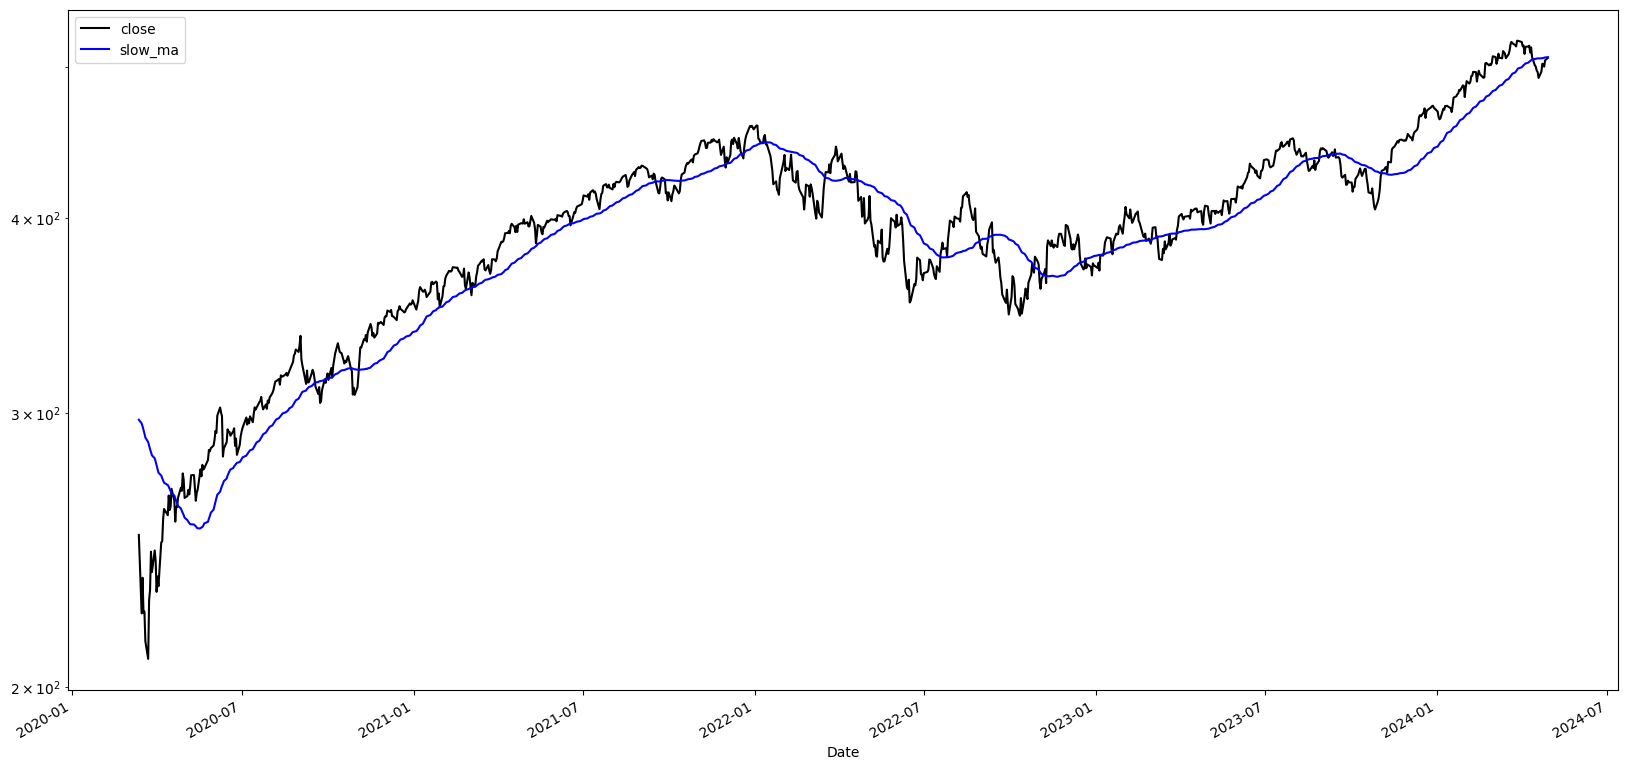

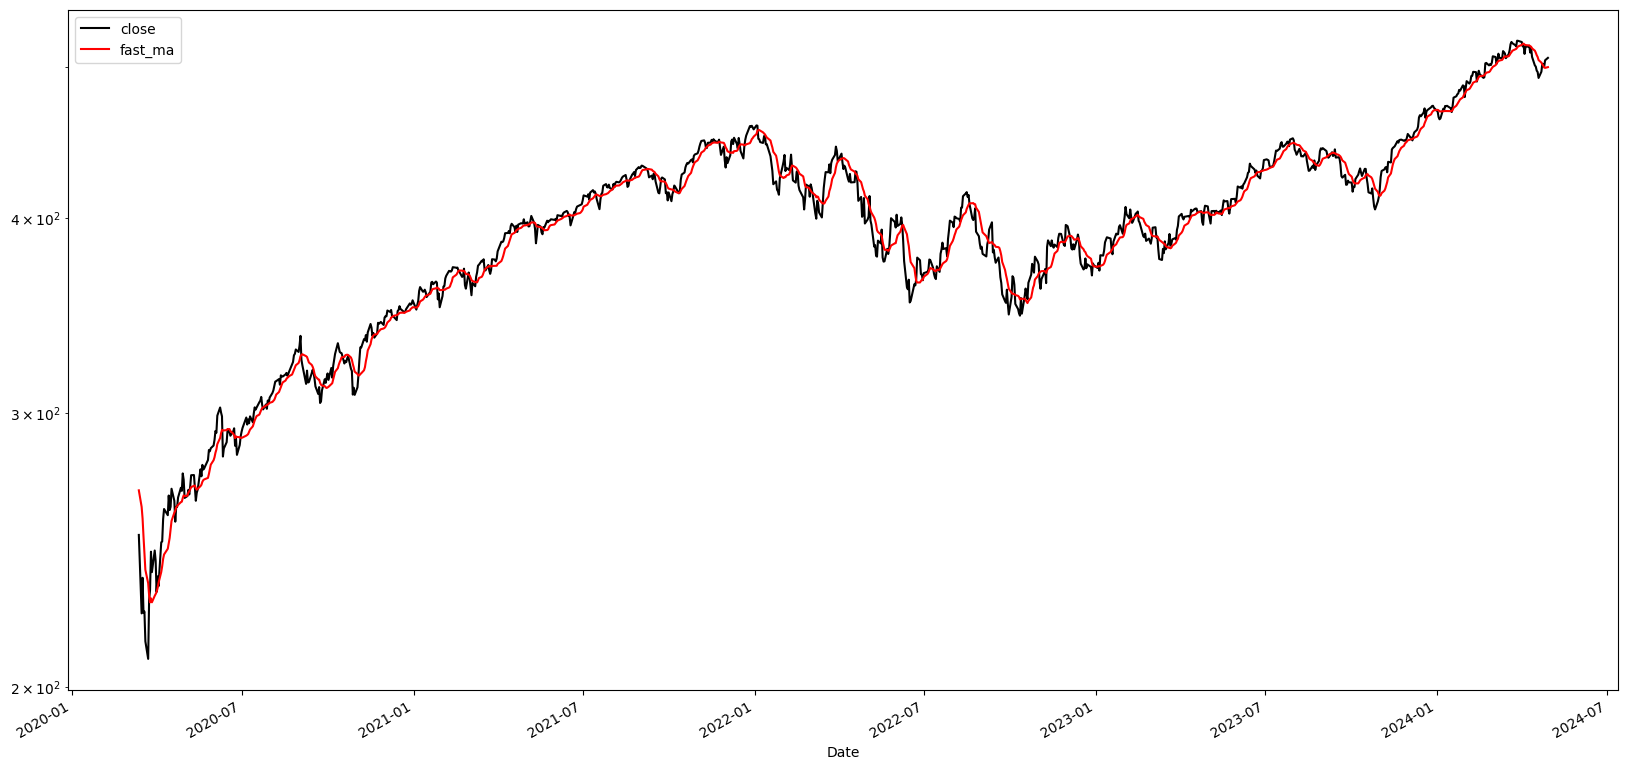

In [11]:
# Plot slow and fast vs close moving averages (MA)
close_spy[['close','slow_ma']].plot(logy=True, figsize = (20,10), color=['black','blue'])
close_spy[['close','fast_ma']].plot(logy=True, figsize = (20,10), color=['black','red'])

<Axes: xlabel='Date'>

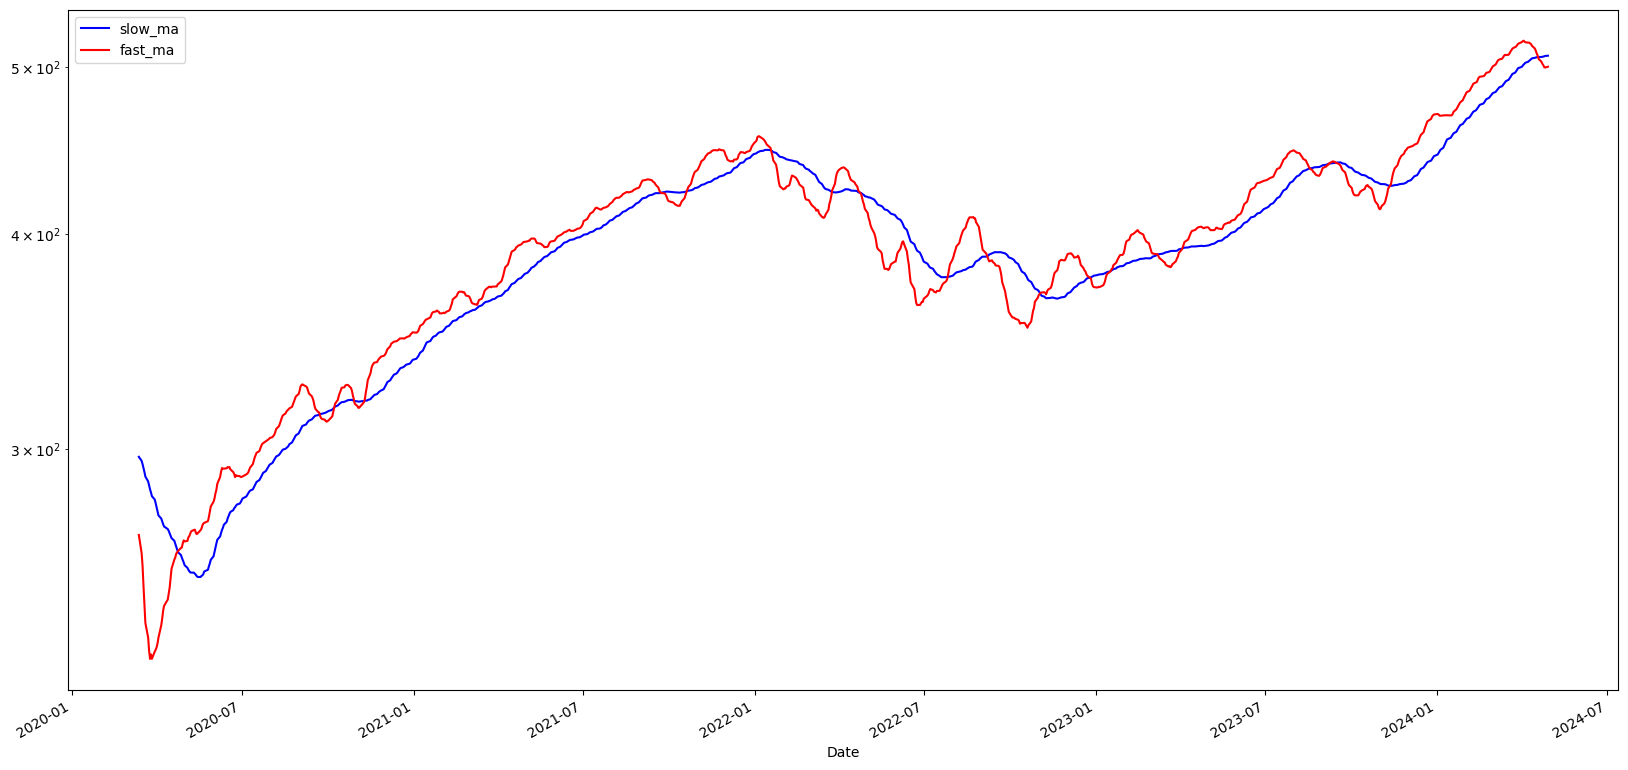

In [12]:
# Plot slow vs fast moving averages (MA)
close_spy[['slow_ma','fast_ma']].plot(logy=True, figsize = (20,10), color=['blue', 'red'])

Great, we now have our two moving averages (MA). Fast MA for a 10 day period and a Slow MA for a 50 day period.

Now remember:

-> Fast MA crossing above Slow MA indicates a buy signal (bullish)

-> Fast MA crossing below Slow MA indicates a sell signal (bearish)

<Axes: xlabel='Date'>

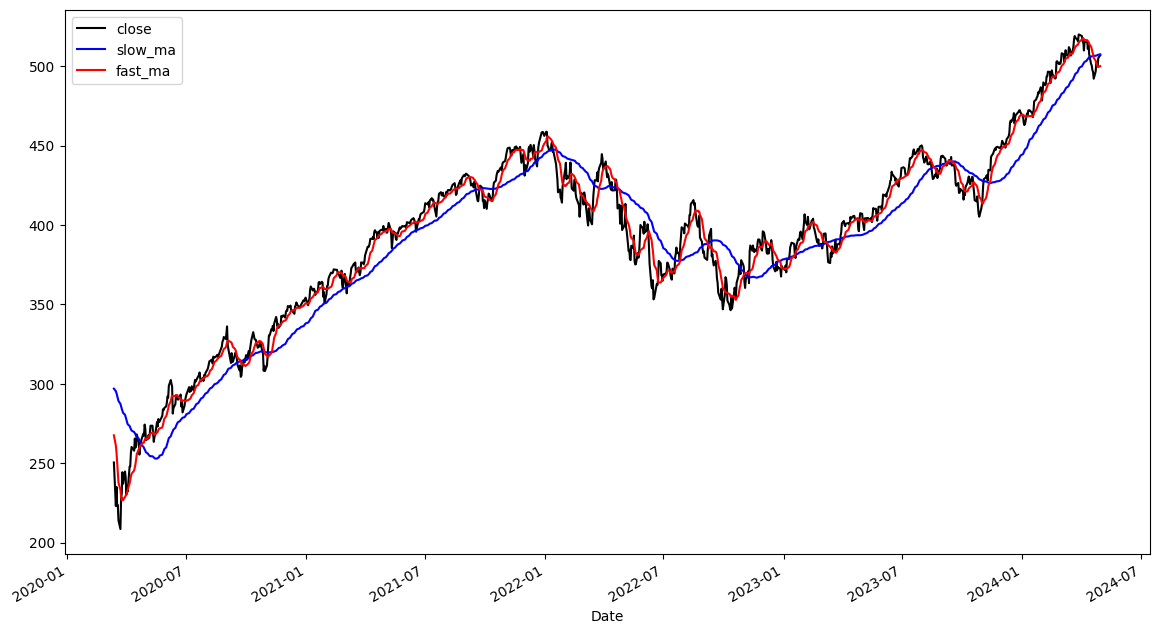

In [13]:
close_spy[['close','slow_ma', 'fast_ma']].plot(figsize = (14,8), color=['black', 'blue', 'red'])

# 2. Compute Signals

In [14]:
# Buy the stock at any point where the fast MA is above the slow MA
close_spy = close_spy.assign(
    signal = lambda x: np.where(x.fast_ma > x.slow_ma, 1, 0)
)

In [15]:
# Check the data
close_spy.head(100)

,close,daily_change,slow_ma,fast_ma,signal
Date,,,,,
2020-03-13 00:00:00+00:00,250.533539,0.085486,296.991822,267.589571,0
2020-03-16 00:00:00+00:00,223.119217,-0.109424,295.410034,261.148553,0
2020-03-17 00:00:00+00:00,235.165878,0.053992,294.114948,256.735472,0
2020-03-18 00:00:00+00:00,223.258759,-0.050633,292.558833,249.957719,0
2020-03-19 00:00:00+00:00,223.733154,0.002125,291.029138,244.194847,0
...,...,...,...,...,...
2020-07-29 00:00:00+00:00,305.558319,0.012298,292.707029,303.758578,1
2020-07-30 00:00:00+00:00,304.468201,-0.003568,293.332379,304.056506,1
2020-07-31 00:00:00+00:00,306.874054,0.007902,293.913025,304.507617,1


<Axes: xlabel='Date'>

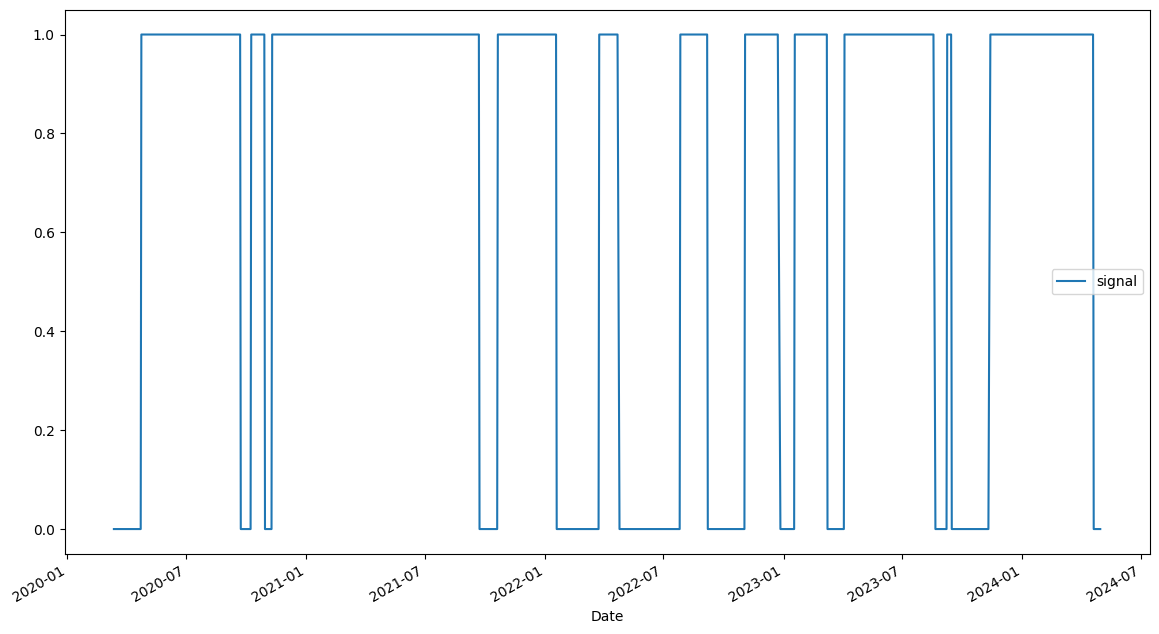

In [16]:
# Graph the points at which we are going to hold stock
close_spy[['signal']].plot(figsize = (14,8))

### We now move all signals up one day from when the signal is generated

This is important for a number of reasons:
- Avoid Look-Ahead Bias
- Time Alignment for Signal Execution
- Simulating Realistic Trading Strategies

In [17]:
# Move the shift our buy signals to a day ahead to simulate real world trading better
close_spy['signal'] = close_spy['signal'].shift(1,fill_value = 0)

In [18]:
# Get the daily change for when we are holding stock
close_spy['R_strategy'] = close_spy['daily_change'] * close_spy['signal']

In [19]:
close_spy.head(100)

,close,daily_change,slow_ma,fast_ma,signal,R_strategy
Date,,,,,,
2020-03-13 00:00:00+00:00,250.533539,0.085486,296.991822,267.589571,0,0.000000
2020-03-16 00:00:00+00:00,223.119217,-0.109424,295.410034,261.148553,0,-0.000000
2020-03-17 00:00:00+00:00,235.165878,0.053992,294.114948,256.735472,0,0.000000
2020-03-18 00:00:00+00:00,223.258759,-0.050633,292.558833,249.957719,0,-0.000000
2020-03-19 00:00:00+00:00,223.733154,0.002125,291.029138,244.194847,0,0.000000
...,...,...,...,...,...,...
2020-07-29 00:00:00+00:00,305.558319,0.012298,292.707029,303.758578,1,0.012298
2020-07-30 00:00:00+00:00,304.468201,-0.003568,293.332379,304.056506,1,-0.003568
2020-07-31 00:00:00+00:00,306.874054,0.007902,293.913025,304.507617,1,0.007902


# Time to Backtest

Now comes when of the most important things within Algo Trading, answering the question of:

**Will I make money?**

And to answer that we are going to test the performance of our strategy against historical data.

In [20]:
# Let's say that theoretically we invested £100 back in 2020
money = 100

In [21]:
# Get the cumulative product over the 4 years for both our strategy and when we just buy and hold
cumprod_strategy = (1 + close_spy['R_strategy']).cumprod()
cumprod_buy_and_hold = (1 + close_spy['daily_change']).cumprod()
cumprod_signals = pd.DataFrame(dict(
    strategy = cumprod_strategy,
    buy_hold = cumprod_buy_and_hold
))
cumprod_signals.head(100)

,strategy,buy_hold
Date,,
2020-03-13 00:00:00+00:00,1.000000,1.085486
2020-03-16 00:00:00+00:00,1.000000,0.966708
2020-03-17 00:00:00+00:00,1.000000,1.018903
2020-03-18 00:00:00+00:00,1.000000,0.967313
2020-03-19 00:00:00+00:00,1.000000,0.969368
...,...,...
2020-07-29 00:00:00+00:00,1.154012,1.323892
2020-07-30 00:00:00+00:00,1.149894,1.319169
2020-07-31 00:00:00+00:00,1.158981,1.329593


In [22]:
# Scale our money by the cumulative products
px.line(money * cumprod_signals)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=strategy<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'strategy',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'strategy',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2020, 3, 13, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 3, 16, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 3, 17, 0, 0, tzinfo=datetime.timezone.utc), ...,
                          datetime.datetime(2024, 4, 25, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 4, 26, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 4, 29, 0, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'xaxis': 'x',
              'y': array([100.        , 100.        , 100.        , ..., 162.60329785,
                          162.60329785, 162.60329785]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=buy_hold<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'buy_hold',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'buy_hold',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2020, 3, 13, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 3, 16, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 3, 17, 0, 0, tzinfo=datetime.timezone.utc), ...,
                          datetime.datetime(2024, 4, 25, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 4, 26, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 4, 29, 0, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'xaxis': 'x',
              'y': array([108.54862342,  96.67082487, 101.89027978, ..., 216.78059811,
                          218.83435898, 219.60934711]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Date'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

So let's have a look at performance and try to digest why this didn't work...

In [23]:
max_peaks = cumprod_signals.cummax()
drawdown = (cumprod_signals - max_peaks) / max_peaks
px.line(drawdown)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=strategy<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'strategy',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'strategy',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2020, 3, 13, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 3, 16, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 3, 17, 0, 0, tzinfo=datetime.timezone.utc), ...,
                          datetime.datetime(2024, 4, 25, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 4, 26, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 4, 29, 0, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'xaxis': 'x',
              'y': array([ 0.        ,  0.        ,  0.        , ..., -0.05353897, -0.05353897,
                          -0.05353897]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=buy_hold<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'buy_hold',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'buy_hold',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2020, 3, 13, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 3, 16, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 3, 17, 0, 0, tzinfo=datetime.timezone.utc), ...,
                          datetime.datetime(2024, 4, 25, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 4, 26, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 4, 29, 0, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'xaxis': 'x',
              'y': array([ 0.        , -0.10942376, -0.06133973, ..., -0.03761679, -0.02849925,
                          -0.02505874]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Date'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

In [24]:
annualized_returns = (1 + close_spy[['daily_change', 'R_strategy']].mean())**252 - 1
annualized_std_deviation = close_spy[['daily_change', 'R_strategy']].std() * np.sqrt(252)
max_drawdown = (drawdown.min()) * -1
strategy_sharpe_ratio = (annualized_returns['R_strategy'] - 0.05) / annualized_std_deviation['R_strategy']
buy_hold_sharpe_ratio = (annualized_returns['daily_change'] - 0.05) / annualized_std_deviation['daily_change']


print(f"**Annualized Returns for:** \n Buy_Hold {annualized_returns['daily_change']} \n MA Strategy {annualized_returns['R_strategy']}")
print(f"**Annualized Std Deviation:** \n Buy_Hold {annualized_std_deviation['daily_change']} \n MA Strategy {annualized_std_deviation['R_strategy']}")
print(f"**Max Drawdown:** \n Buy_Hold {max_drawdown['buy_hold']} \n MA Strategy {max_drawdown['strategy']}")
print(f"**Sharpe Ratio:** \n Buy_Hold {buy_hold_sharpe_ratio} \n MA Strategy {strategy_sharpe_ratio}")

**Annualized Returns for:** 
 Buy_Hold 0.23630285087863578 
 MA Strategy 0.1343807646427122
**Annualized Std Deviation:** 
 Buy_Hold 0.20659428958961745 
 MA Strategy 0.12786990130340695
**Max Drawdown:** 
 Buy_Hold 0.24496387449508117 
 MA Strategy 0.14943080655767732
**Sharpe Ratio:** 
 Buy_Hold 0.9017812217787388 
 MA Strategy 0.6598954389000062


# Optimizing Algo

### Let's pull all this work together now

We are going to loop through all potential moving average windows for fast and slow to try and see which would be the best for our stock...

In [25]:
# Have some fun here and explore what stocks this strategy works for and why...
ticker = 'SPY'
# ticker = 'TLT'
# ticker = 'NVDA'
# ticker = 'AAPL'
# ticker = 'INTC'

In [26]:
data = yf.download(
  tickers = ticker,
  start="2020-01-01", # From what point do we want to start getting stock data
  end="2024-04-30", # From what point do we want to stop getting stock data
  interval = "1d", # The sample rate of the data one stock data every day
  ignore_tz=True,
  auto_adjust=True, # Adjust all fields by splits and dividends
)

results = []
for fast_ma in range(5,50,5):
    for slow_ma in range(30, 300, 5):
        if fast_ma >= slow_ma:
            continue
        else:
            close_stock = data['Close'].copy()
            close_stock = pd.DataFrame(close_stock)
            close_stock.columns = ['close']
            close_stock['daily_change'] = close_stock.close.pct_change().fillna(0)
            close_stock['slow_ma'] = close_stock.close.rolling(window = slow_ma).mean()
            close_stock['fast_ma'] = close_stock.close.rolling(window = fast_ma).mean()
            close_stock = close_stock[close_stock.notnull().all(1)]

            close_stock = close_stock.assign(
                signal = lambda x: np.where(x.fast_ma > x.slow_ma, 1, -1)
            )
            close_stock['signal'] = close_stock['signal'].shift(1,fill_value = 0)
            close_stock['MA_strategy'] = close_stock['daily_change'] * close_stock['signal']

            cumprod_buy_and_hold = (1 + close_stock['daily_change']).cumprod()
            cumprod_strategy = (1 + close_stock['MA_strategy']).cumprod()
            max_peaks = cumprod_strategy.cummax()
            drawdown = (cumprod_strategy - max_peaks) / max_peaks

            annualized_returns = (1 + (close_stock[['daily_change', 'MA_strategy']]).mean())**252 - 1
            annualized_std_deviation = close_stock[['daily_change', 'MA_strategy']].std() * np.sqrt(252)
            max_drawdown = (drawdown.min() - 1) * -1

            perf = dict(
                fast_ma = fast_ma,
                slow_ma = slow_ma,
                annualized_returns = annualized_returns['MA_strategy'],
                annualized_std_deviation = annualized_std_deviation['MA_strategy'],
                annualized_returns_buy_and_hold = annualized_returns['daily_change'],
                max_drawdown = max_drawdown,
                cumprod_buy_and_hold = cumprod_buy_and_hold.iloc[-1],
                cumprod_strategy = cumprod_strategy.iloc[-1],
                strategy_sharpe_ratio = (annualized_returns['MA_strategy'] - 0.05) / annualized_std_deviation['MA_strategy'],
                buy_hold_sharpe_ratio = (annualized_returns['daily_change'] - 0.05) / annualized_std_deviation['daily_change']
            )

            results.append(perf)

[*********************100%***********************]  1 of 1 completed


In [27]:
results = pd.DataFrame(results)

In [28]:
results.sort_values('annualized_returns', ascending=False).head()

,fast_ma,slow_ma,annualized_returns,annualized_std_deviation,annualized_returns_buy_and_hold,max_drawdown,cumprod_buy_and_hold,cumprod_strategy,strategy_sharpe_ratio,buy_hold_sharpe_ratio
401,40,175,0.218765,0.170128,0.152475,1.155895,1.587199,1.944766,0.991986,0.600694
350,35,175,0.216482,0.170137,0.152475,1.155895,1.587199,1.931578,0.978519,0.600694
402,40,180,0.215088,0.170374,0.154205,1.158819,1.591742,1.916413,0.968976,0.610675
403,40,185,0.207697,0.170134,0.169513,1.158819,1.664901,1.868492,0.926896,0.701902
351,35,180,0.204478,0.170413,0.154205,1.167680,1.591742,1.856682,0.906492,0.610675


In [29]:
results.sort_values('strategy_sharpe_ratio', ascending=False).head()

,fast_ma,slow_ma,annualized_returns,annualized_std_deviation,annualized_returns_buy_and_hold,max_drawdown,cumprod_buy_and_hold,cumprod_strategy,strategy_sharpe_ratio,buy_hold_sharpe_ratio
401,40,175,0.218765,0.170128,0.152475,1.155895,1.587199,1.944766,0.991986,0.600694
350,35,175,0.216482,0.170137,0.152475,1.155895,1.587199,1.931578,0.978519,0.600694
402,40,180,0.215088,0.170374,0.154205,1.158819,1.591742,1.916413,0.968976,0.610675
403,40,185,0.207697,0.170134,0.169513,1.158819,1.664901,1.868492,0.926896,0.701902
351,35,180,0.204478,0.170413,0.154205,1.167680,1.591742,1.856682,0.906492,0.610675


In [30]:
eval_metric = 'strategy_sharpe_ratio'

df_mat = results.pivot(index = 'fast_ma', columns = 'slow_ma', values=eval_metric)

fig = px.imshow(df_mat,
                color_continuous_scale = 'RdYlGn',
                aspect = 'auto')

fig.update_layout(
    title=eval_metric,
    xaxis_title='Slow MA',
    yaxis_title='Fast MA',
)

fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'slow_ma: %{x}<br>fast_ma: %{y}<br>color: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'x': array([ 30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,  95,
                          100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165,
                          170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235,
                          240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295]),
              'xaxis': 'x',
              'y': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45]),
              'yaxis': 'y',
              'z': array([[-0.03326999, -0.06367067,  0.12158103, ..., -0.06832802,  0.02283415,
                            0.07384095],
                          [-0.22669066, -0.32951009,  0.1462999 , ..., -0.09606106, -0.07410611,
                            0.03886697],
                          [-0.2324068 , -0.1475547 ,  0.08353666, ..., -0.0888618 , -0.0355851 ,
                            0.00912104],
                          ...,
                          [        nan,         nan,  0.13426111, ...,  0.06680014,  0.07444356,
                            0.04938941],
                          [        nan,         nan,         nan, ...,  0.21129356,  0.32124775,
                            0.34347141],
                          [        nan,         nan,         nan, ...,  0.41447447,  0.28721502,
                            0.29729695]])}],
    'layout': {'coloraxis': {'colorscale': [[0.0, 'rgb(165,0,38)'], [0.1,
                                            'rgb(215,48,39)'], [0.2,
                                            'rgb(244,109,67)'], [0.3,
                                            'rgb(253,174,97)'], [0.4,
                                            'rgb(254,224,139)'], [0.5,
                                            'rgb(255,255,191)'], [0.6,
                                            'rgb(217,239,139)'], [0.7,
                                            'rgb(166,217,106)'], [0.8,
                                            'rgb(102,189,99)'], [0.9,
                                            'rgb(26,152,80)'], [1.0,
                                            'rgb(0,104,55)']]},
               'margin': {'t': 60},
               'template': '...',
               'title': {'text': 'strategy_sharpe_ratio'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Slow MA'}},
               'yaxis': {'anchor': 'x', 'autorange': 'reversed', 'domain': [0.0, 1.0], 'title': {'text': 'Fast MA'}}}
})

In [31]:
# Get our optimised moving average windows
idx = results['strategy_sharpe_ratio'].idxmax()
fast_ma = results.loc[idx, 'fast_ma']
slow_ma = results.loc[idx, 'slow_ma']

#### Let's graph our improved strategy...

In [32]:
data = yf.download(
  tickers = ticker,
  start="2020-01-01", # From what point do we want to start getting stock data
  end="2024-04-30", # From what point do we want to stop getting stock data
  interval = "1d", # The sample rate of the data one stock data every day
  ignore_tz=True,
  auto_adjust=True, # Adjust all fields by splits and dividends
)
close_stock = data['Close'].copy()
close_stock = pd.DataFrame(close_stock)
close_stock.columns = ['close']
close_stock['daily_change'] = close_stock.close.pct_change().fillna(0)
close_stock['slow_ma'] = close_stock.close.rolling(window = slow_ma).mean()
close_stock['fast_ma'] = close_stock.close.rolling(window = fast_ma).mean()
close_stock = close_stock[close_stock.notnull().all(1)]
close_stock = close_stock.assign(
                signal = lambda x: np.where(x.fast_ma > x.slow_ma, 1, 0)
            )
close_stock['signal'] = close_stock['signal'].shift(1,fill_value = 0)
close_stock['MA_strategy'] = close_stock['daily_change'] * close_stock['signal']

# Get the cumulative product over the 4 years for both our strategy and when we just buy and hold
cumprod_strategy = (1 + close_stock['MA_strategy']).cumprod()
cumprod_buy_and_hold = (1 + close_stock['daily_change']).cumprod()
cumprod_signals = pd.DataFrame(dict(
    strategy = cumprod_strategy,
    buy_hold = cumprod_buy_and_hold
))

# Scale our money by the cumulative products
px.line(100 * cumprod_signals)


[*********************100%***********************]  1 of 1 completed


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=strategy<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'strategy',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'strategy',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2020, 9, 10, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 9, 11, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 9, 14, 0, 0, tzinfo=datetime.timezone.utc), ...,
                          datetime.datetime(2024, 4, 25, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 4, 26, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 4, 29, 0, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'xaxis': 'x',
              'y': array([100.        , 100.05093059, 101.3687269 , ..., 179.51333147,
                          181.21402543, 181.85578352]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=buy_hold<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'buy_hold',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'buy_hold',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2020, 9, 10, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 9, 11, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 9, 14, 0, 0, tzinfo=datetime.timezone.utc), ...,
                          datetime.datetime(2024, 4, 25, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 4, 26, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 4, 29, 0, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'xaxis': 'x',
              'y': array([ 98.2636236 ,  98.31366985,  99.60858426, ..., 156.67541162,
                          158.15974109, 158.71985387]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Date'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

## Extension

1. In this notebook we only buy stock, how could we implement shorting stocks when the fast MA moves below the slow MA?

2. In this notebook we have explored one of the more basic trading strategies, now we have done that and have seen how we implement, backtest and optimise a strategy try and go and do the same for the strategies:

- Mean Reversion
- Pairs Trading